In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**1️⃣ Load Data**

In [2]:
train_df = pd.read_csv("/content/train.csv")

**2️⃣ Explore the Data**

In [3]:
# Data Overview
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Check Data for Null Values and Datatypes
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Shape of Data
train_df.shape

(891, 12)

In [6]:
# Check Number of Null Values in the DataFrame
train_df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
# Check DataFrame for Duplicates
train_df.duplicated().sum()

np.int64(0)

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Select object columns
object_cols = train_df.select_dtypes(include='object')

# Create a summary DataFrame (print the number of uniqu values and 5 values to see them)
summary = pd.DataFrame({
    'Unique Count': object_cols.nunique(),
    'Sample Values': object_cols.apply(lambda col: col.dropna().unique()[:5])
}).sort_values(by='Unique Count')

# Display the summary
summary

,Unique Count,Sample Values
Sex,2,"[male, female]"
Embarked,3,"[S, C, Q]"
Cabin,147,"[C85, C123, E46, G6, C103]"
Ticket,681,"[A/5 21171, PC 17599, STON/O2. 3101282, 113803..."
Name,891,"[Braund, Mr. Owen Harris, Cumings, Mrs. John B..."


**3️⃣ Data Cleaning**

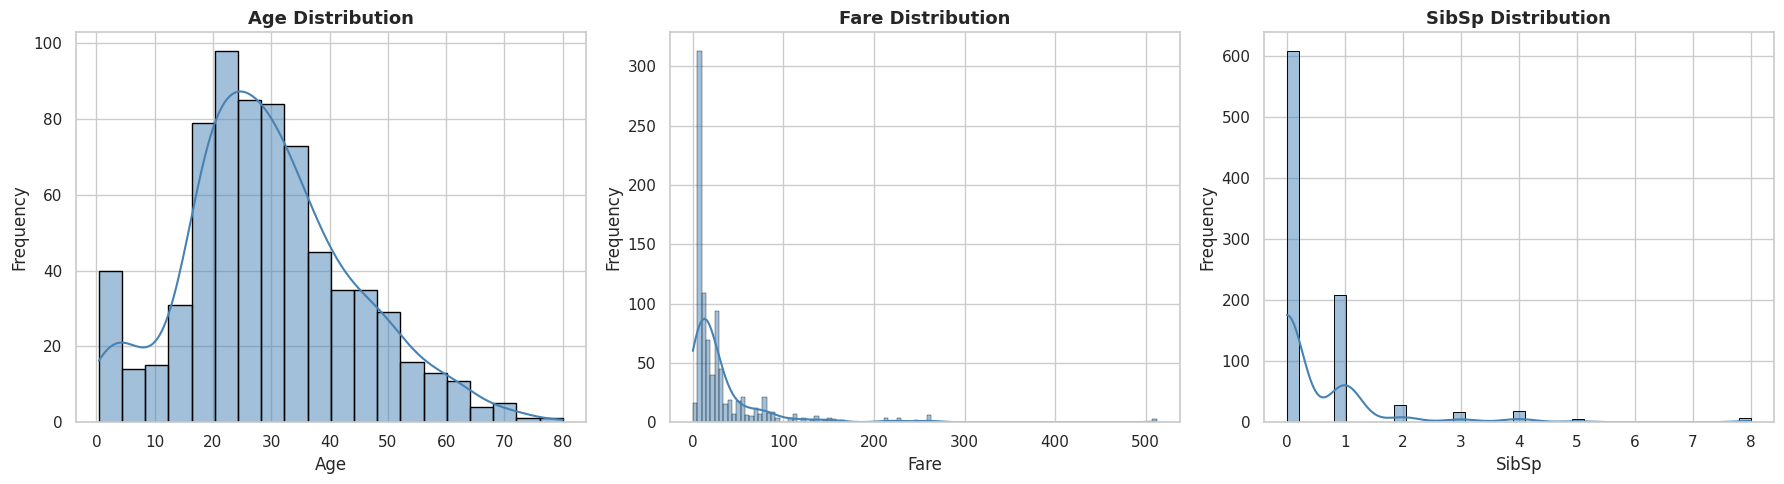

In [10]:
# Plot Histograms with KDEs

sns.set(style='whitegrid')
num_cols = ['Age', 'Fare', 'SibSp']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for idx, col in enumerate(num_cols):
    sns.histplot(data=train_df, x=col, kde=True, ax=axes[idx], color='steelblue', edgecolor='black')
    axes[idx].set_title(f"{col} Distribution", fontsize=13, weight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [11]:
# Measure Skewness and Kurtosis
for col in num_cols:
    skew = train_df[col].skew()
    kurt = train_df[col].kurt()
    print(f"{col}: Skewness = {skew:.2f}, Kurtosis = {kurt:.2f}")

Age: Skewness = 0.39, Kurtosis = 0.18
Fare: Skewness = 4.79, Kurtosis = 33.40
SibSp: Skewness = 3.70, Kurtosis = 17.88


In [12]:
# Handling missing values in Age using median (better for skewed data)
if train_df['Age'].isnull().sum() > 0:
    age_median = train_df['Age'].median()
    train_df['Age'].fillna(age_median, inplace=True)

In [13]:
# Handling Fare Outliers
Q1 = train_df['Fare'].quantile(0.25)
Q3 = train_df['Fare'].quantile(0.75)
IQR = Q3 - Q1

upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
train_df['Fare'] = train_df['Fare'].clip(lower, upper)

In [14]:
Embarked_mode = train_df['Embarked'].mode()[0]

# Fill missing Embarked
train_df['Embarked'].fillna(Embarked_mode, inplace=True)

In [15]:
train_df['Title'] = train_df['Name'].str.extract(r',\s*([^\.]*)\s*\.', expand=False)
train_df['Title'] = train_df['Title'].str.strip()

# Optionally map rare titles to common ones
title_mapping = {
    "Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs",
    "Lady": "Royalty", "Countess": "Royalty", "Dona": "Royalty",
    "Sir": "Royalty", "Jonkheer": "Royalty", "Don": "Royalty",
    "Capt": "Officer", "Col": "Officer", "Major": "Officer", "Dr": "Officer", "Rev": "Officer"
}
train_df['Title'] = train_df['Title'].replace(title_mapping)

In [16]:
# Drop Columns
train_df.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True)

In [17]:
train_df['Title'] = train_df['Title'].replace({'the Countess': 'Royalty'})

In [18]:
# New feature: total family members on board
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1  # +1 includes the passenger themselves

# Create a binary feature for those traveling alone
train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int)

In [19]:
# Define age bins and labels
bins = [0, 1, 12, 18, 35, 60, 80]
labels = ['Baby', 'Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

# Create AgeGroup column
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=bins, labels=labels, right=False)

In [20]:
# Find object columns with < 15 unique values, not excluded
multi_class_cat_cols = [
    col for col in train_df.select_dtypes(include="object").columns
    if train_df[col].nunique() < 15
]

# Convert to category dtype
for col in multi_class_cat_cols:
    train_df[col] = train_df[col].astype('category')

# Preview the types
print(train_df[multi_class_cat_cols].dtypes)

Sex         category
Embarked    category
Title       category
dtype: object


In [21]:
# Create a summary DataFrame
summary = pd.DataFrame({
    'Data type': train_df.dtypes,
    'Sample Values': train_df.apply(lambda col: col.dropna().unique()[:3])
})

# Display the summary
summary

,Data type,Sample Values
Survived,int64,"[0, 1]"
Pclass,int64,"[3, 1, 2]"
Sex,category,"['male', 'female'] Categories (2, object): ['f..."
Age,float64,"[22.0, 38.0, 26.0]"
SibSp,int64,"[1, 0, 3]"
Parch,int64,"[0, 1, 2]"
Fare,float64,"[7.25, 65.6344, 7.925]"
Embarked,category,"['S', 'C', 'Q'] Categories (3, object): ['C', ..."
Title,category,"['Mr', 'Mrs', 'Miss'] Categories (6, object): ..."
FamilySize,int64,"[2, 1, 5]"


**4️⃣ Analyze Relationships**

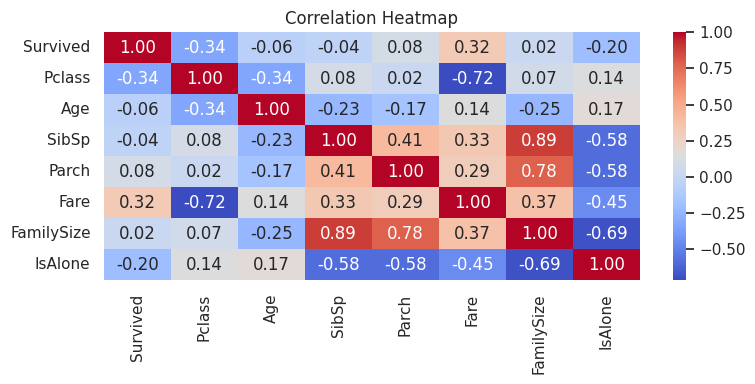

In [22]:
# Heatmap of correlation
num_df = train_df.select_dtypes(include='number')
corr = num_df.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

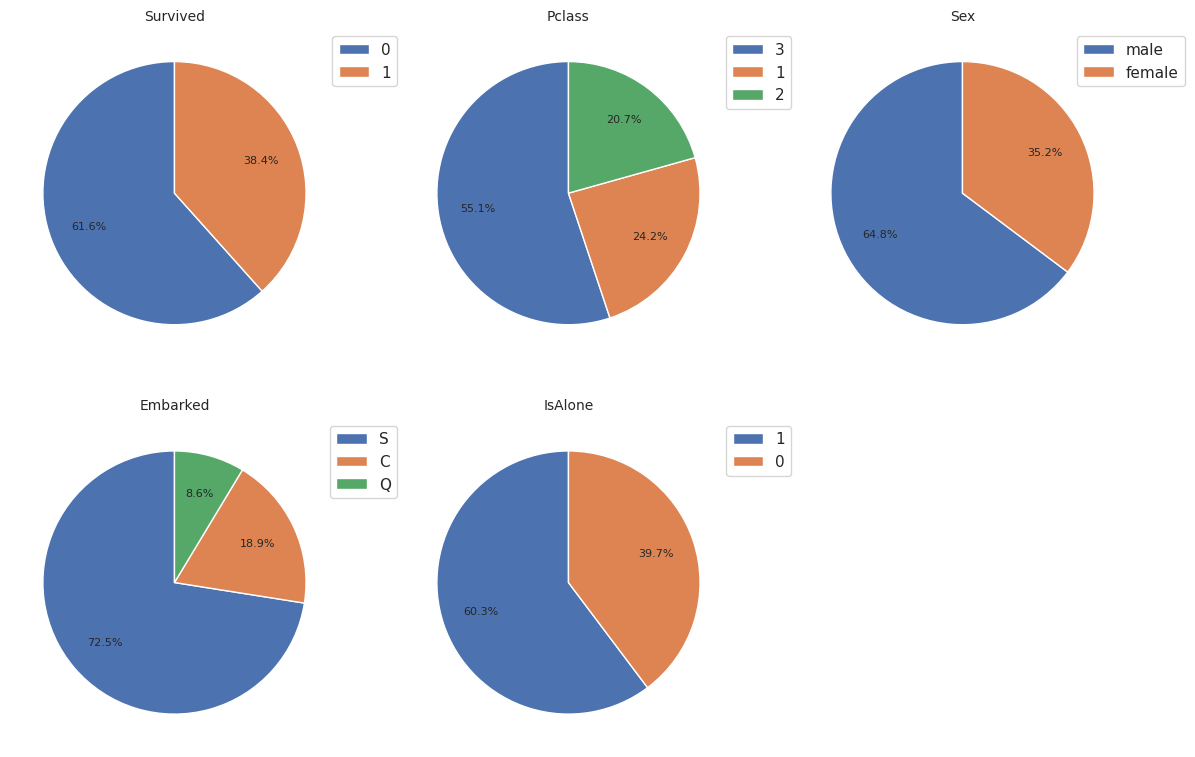

In [23]:
# Pie plot all Columns with maximum 5 unique values
cols_5unique = [col for col in train_df.columns if train_df[col].nunique()<=5 and train_df[col].nunique()>1]
n = len(cols_5unique)
cols = 3
rows = n//cols+int(n%cols!= 0)
fig,axes = plt.subplots(rows,cols,figsize=(cols*4,rows*4))
axes = axes.flatten()
for i,col in enumerate(cols_5unique):
    counts = train_df[col].value_counts()
    counts.plot.pie(ax=axes[i],labels=None,autopct='%1.1f%%',startangle=90,textprops={'fontsize':8},pctdistance=0.7,wedgeprops={'linewidth':1,'edgecolor':'white'})
    axes[i].set_title(col,fontsize=10)
    axes[i].set_ylabel('')
    axes[i].legend(labels=counts.index,loc='upper right',bbox_to_anchor=(1.2,1))
for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

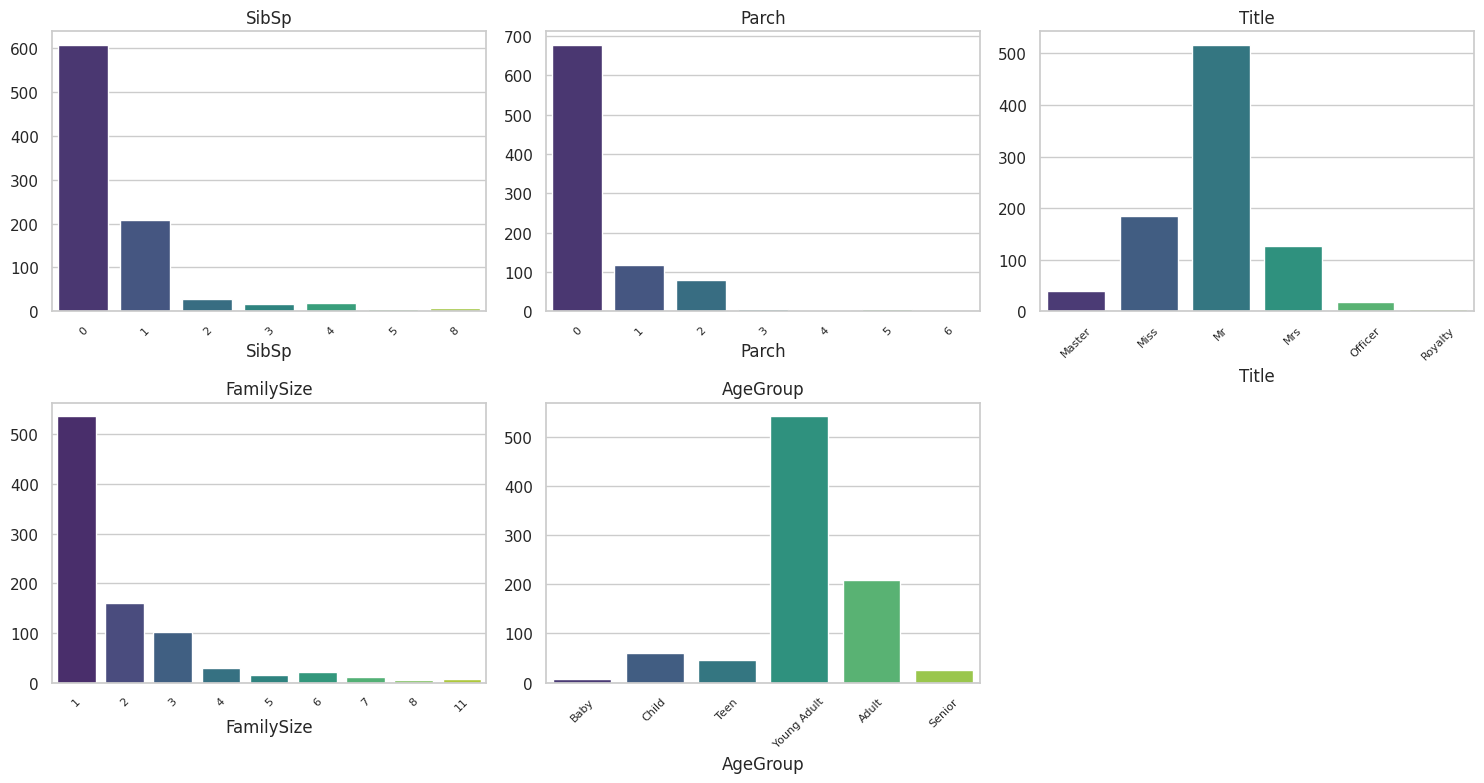

In [24]:
# bar plot all Columns with more than 5 unique values and maximum 15
sns.set(style="whitegrid")
cols_6to15 = [col for col in train_df.columns if 5 < train_df[col].nunique() <= 15]
n = len(cols_6to15)
cols = 3
rows = -(-n // cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()
for i, col in enumerate(cols_6to15):
    counts = train_df[col].value_counts().sort_index()
    sns.barplot(x=counts.index, y=counts.values, ax=axes[i], palette="viridis")
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

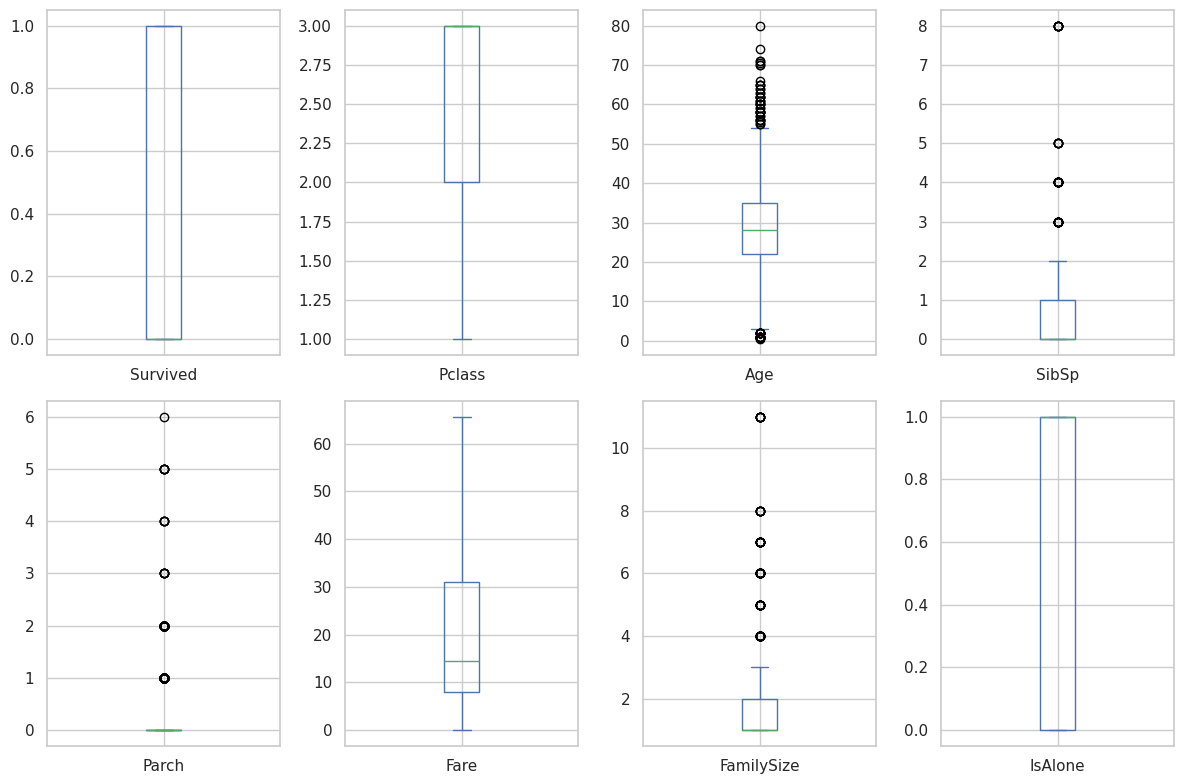

In [25]:
# Box Plots
numeric_cols = train_df.select_dtypes(include='number').columns
n = len(numeric_cols)
cols_per_row = 4
rows = (n + cols_per_row - 1) // cols_per_row
train_df[numeric_cols].plot(kind='box', subplots=True, layout=(rows, cols_per_row), figsize=(cols_per_row * 3, rows * 4), sharey=False)
plt.tight_layout()
plt.show()

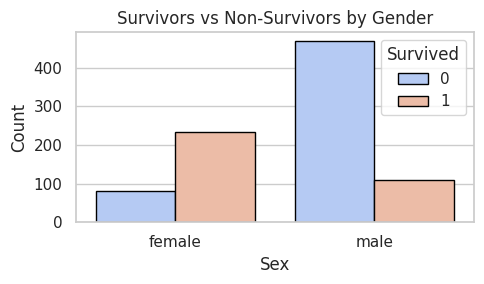

In [26]:
# Survivors vs Non-Survivors by Gender
plt.figure(figsize=(5, 3))
sns.countplot(data=train_df, x='Sex', hue='Survived', palette='coolwarm', edgecolor='black')
plt.title("Survivors vs Non-Survivors by Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

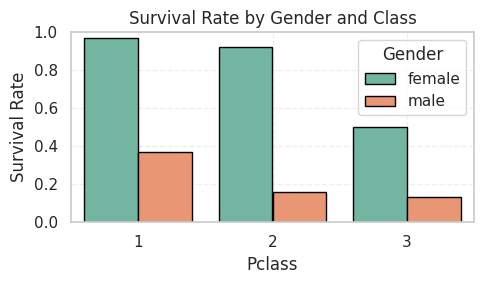

In [27]:
# Combined survival rate
survival_gender_class = train_df.groupby(['Sex', 'Pclass'])['Survived'].mean().reset_index()

plt.figure(figsize=(5, 3))
sns.barplot(data=survival_gender_class, x='Pclass', y='Survived', hue='Sex', palette='Set2', edgecolor='black')
plt.title("Survival Rate by Gender and Class")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.legend(title='Gender')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

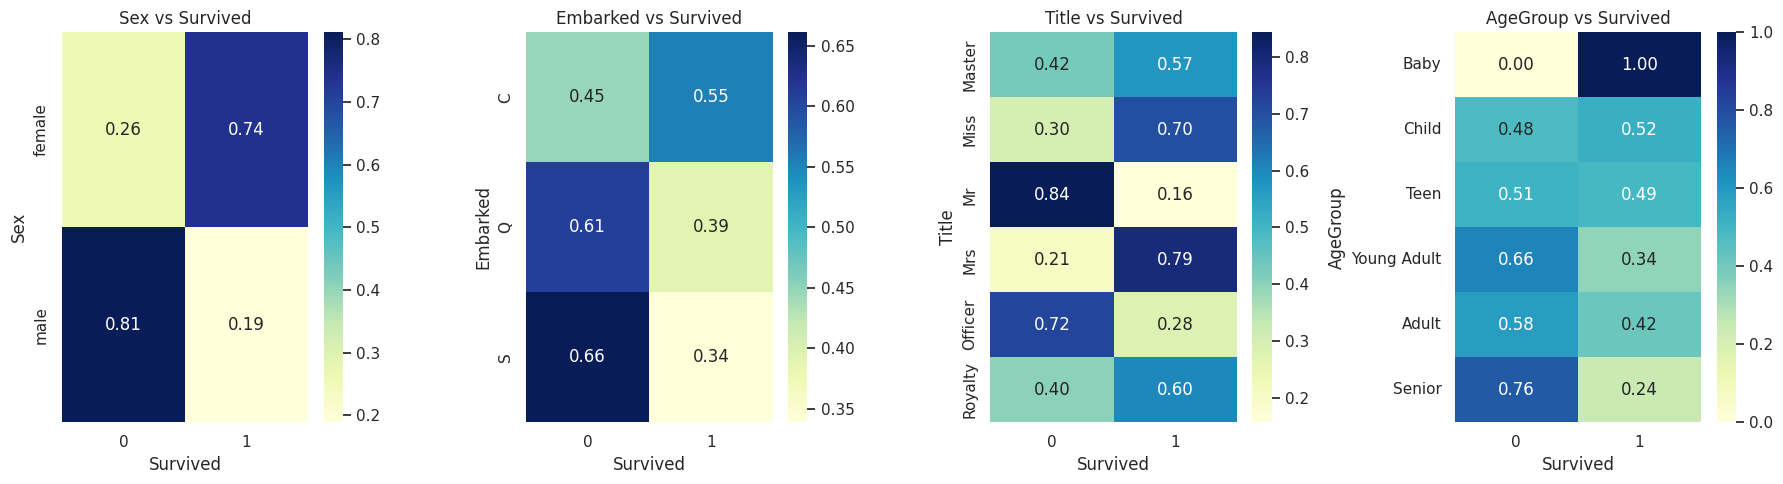

In [28]:
import math

def bin_num(s):
    try: return pd.qcut(s, q=4, duplicates='drop')
    except: return pd.cut(s, bins=4)

def plot_heatmaps(cols, num=False):
    n = len(cols)
    rows = math.ceil(n/4)
    fig, axes = plt.subplots(rows, 4, figsize=(18, 5*rows))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        ax = axes[i]
        x = bin_num(train_df[col]) if num else train_df[col]
        if x.nunique() > 30: ax.axis('off'); continue
        sns.heatmap(pd.crosstab(x, train_df['Survived'], normalize='index'),
                    annot=True, fmt='.2f', cmap='YlGnBu', ax=ax)
        ax.set_title(f'{col} vs Survived')

    for j in range(i+1, len(axes)): axes[j].axis('off')
    plt.tight_layout(); plt.show()

cat = train_df.select_dtypes(include='category').columns
num = train_df.select_dtypes(include=['int64','float64']).drop('Survived', axis=1, errors='ignore').columns

plot_heatmaps(cat)     # Categorical

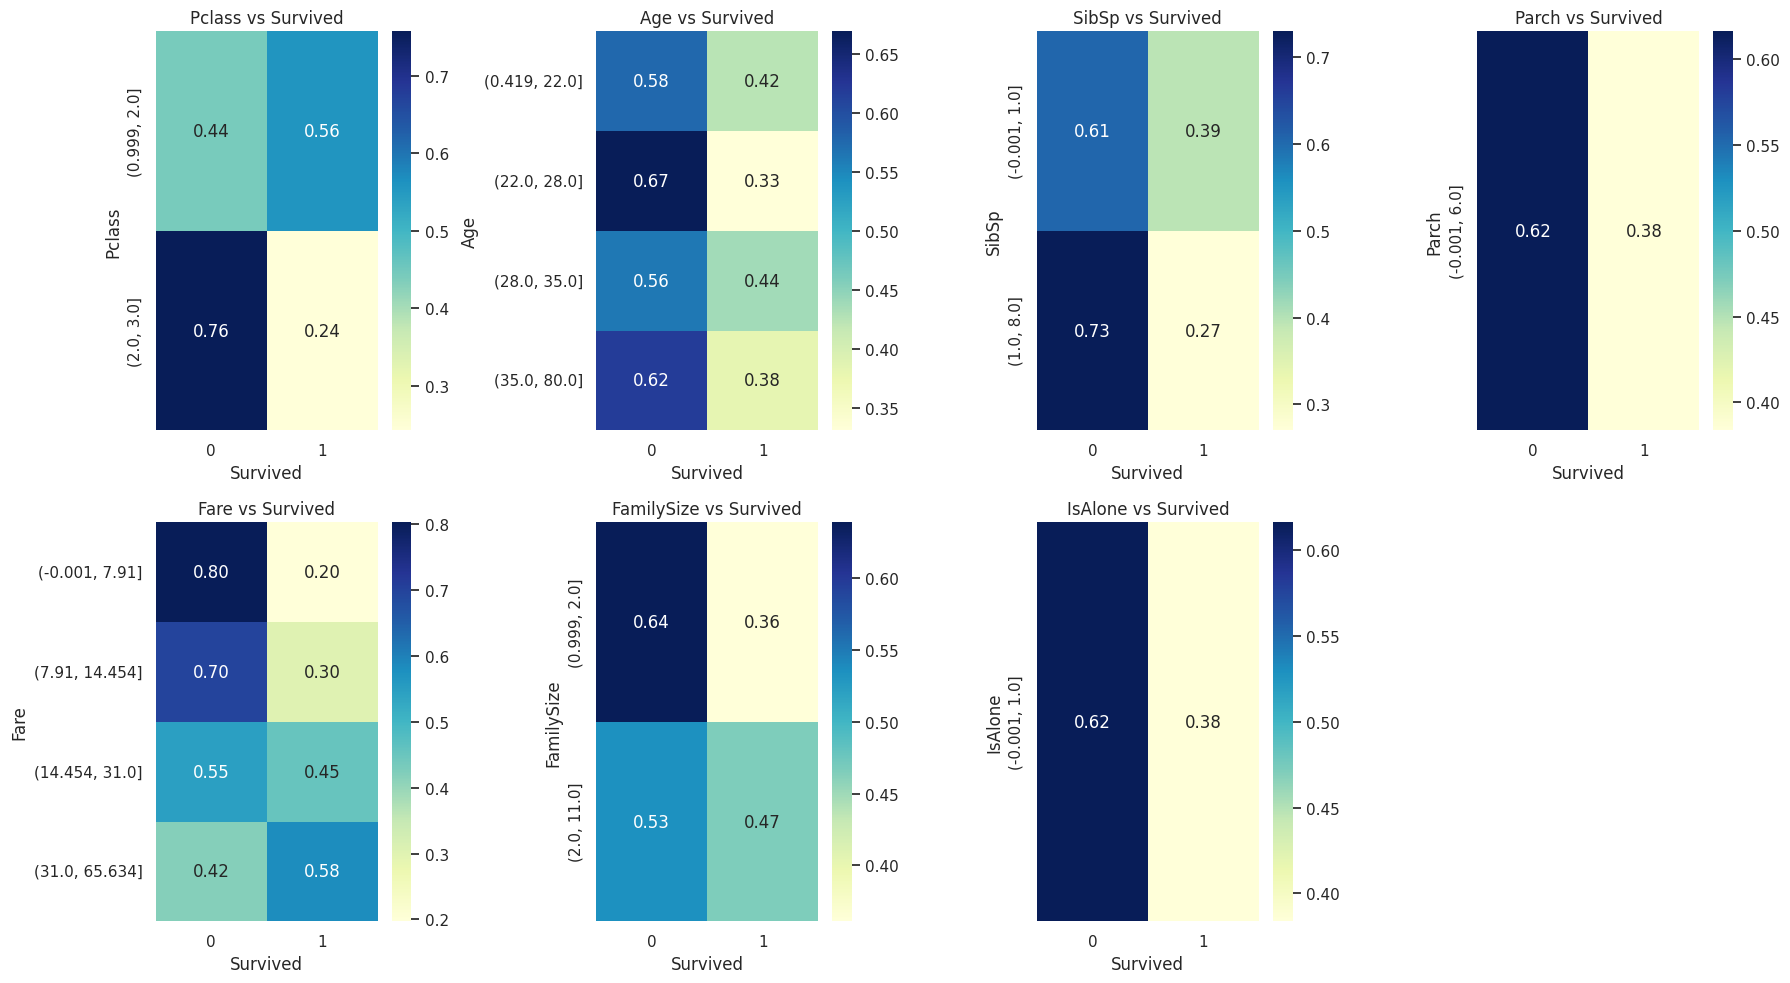

In [29]:
plot_heatmaps(num, 1)  # Numerical

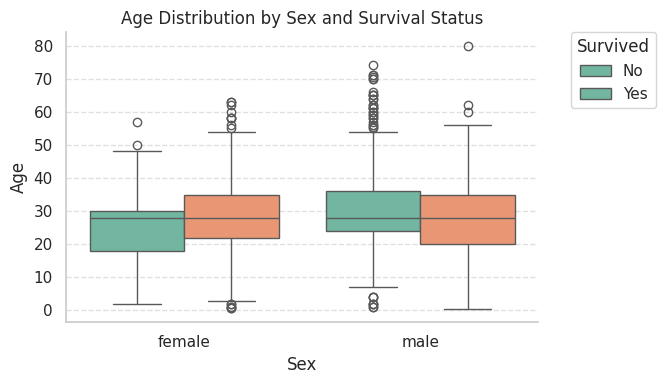

In [30]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=train_df, x='Sex', y='Age', hue='Survived', palette='Set2')
plt.title('Age Distribution by Sex and Survival Status')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Age', fontsize=12,)
plt.legend(title='Survived', labels=['No', 'Yes'], loc='upper right', bbox_to_anchor=(1.25, 1), borderaxespad=0)

sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

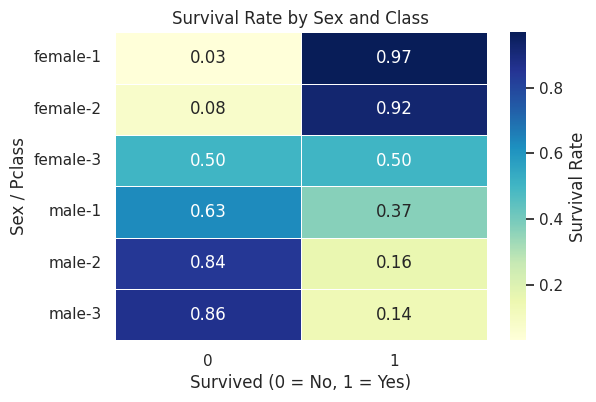

In [31]:
heat_data = pd.crosstab([train_df['Sex'], train_df['Pclass']], train_df['Survived'], normalize='index')

plt.figure(figsize=(6, 4))
sns.heatmap(heat_data, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5, cbar_kws={"label": "Survival Rate"})
plt.title("Survival Rate by Sex and Class")
plt.ylabel("Sex / Pclass")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.show()

**5️⃣ XG Boost Algorithm**

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
train_df['Pclass'] = train_df['Pclass'].astype(int)

In [34]:
# Encode categorical variables
cat_cols = train_df.select_dtypes(include=['object', 'category']).columns

le = LabelEncoder()
for col in cat_cols:
    train_df[col] = train_df[col].astype(str)
    train_df[col] = le.fit_transform(train_df[col])

In [35]:
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [38]:
y_pred = xgb_model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🔍 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy: 0.7988826815642458

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


🔍 Confusion Matrix:
 [[88 17]
 [19 55]]


**6️⃣ SVM Algorithm**

In [39]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1, gamma='scale')  # You can try 'linear' kernel too
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

svm_acc = accuracy_score(y_test, svm_preds)
print(f"SVM Accuracy: {svm_acc:.2%}")

SVM Accuracy: 69.27%


**7️⃣ Random Forest**

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_preds)
print(f"Random Forest Accuracy: {rf_acc:.2%}")

Random Forest Accuracy: 82.12%
